<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Initialize-pyspark-framework" data-toc-modified-id="Initialize-pyspark-framework-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initialize pyspark framework</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Create-functions" data-toc-modified-id="Create-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create functions</a></span></li><li><span><a href="#Data-preparation-process" data-toc-modified-id="Data-preparation-process-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data preparation process</a></span><ul class="toc-item"><li><span><a href="#Merge-datasets" data-toc-modified-id="Merge-datasets-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Merge datasets</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Drop-unused-features" data-toc-modified-id="Drop-unused-features-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Drop unused features</a></span></li><li><span><a href="#Drop-duplicated-values" data-toc-modified-id="Drop-duplicated-values-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Drop duplicated values</a></span></li><li><span><a href="#Drop-nullable-values" data-toc-modified-id="Drop-nullable-values-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Drop nullable values</a></span></li><li><span><a href="#Convert-numeric-to-double" data-toc-modified-id="Convert-numeric-to-double-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Convert numeric to double</a></span></li><li><span><a href="#Convert-datetime-to-date" data-toc-modified-id="Convert-datetime-to-date-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>Convert datetime to date</a></span></li><li><span><a href="#Convert-date-to-quarter" data-toc-modified-id="Convert-date-to-quarter-5.2.6"><span class="toc-item-num">5.2.6&nbsp;&nbsp;</span>Convert date to quarter</a></span></li><li><span><a href="#Add-id-column" data-toc-modified-id="Add-id-column-5.2.7"><span class="toc-item-num">5.2.7&nbsp;&nbsp;</span>Add id column</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Feature-visualization" data-toc-modified-id="Feature-visualization-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Feature visualization</a></span></li><li><span><a href="#Create-feature-vector" data-toc-modified-id="Create-feature-vector-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Create feature vector</a></span></li><li><span><a href="#Split-datasets" data-toc-modified-id="Split-datasets-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Split datasets</a></span></li><li><span><a href="#Standardize-data" data-toc-modified-id="Standardize-data-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Standardize data</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Ridge-regression" data-toc-modified-id="Ridge-regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Ridge regression</a></span></li><li><span><a href="#Lasso-regression" data-toc-modified-id="Lasso-regression-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Lasso regression</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li><li><span><a href="#Gradient-boosted-tree-regression" data-toc-modified-id="Gradient-boosted-tree-regression-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Gradient-boosted tree regression</a></span></li><li><span><a href="#Decision-tree-regression" data-toc-modified-id="Decision-tree-regression-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Decision tree regression</a></span></li><li><span><a href="#Random-forest-regression" data-toc-modified-id="Random-forest-regression-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Random forest regression</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Stop-the-spark-session" data-toc-modified-id="Stop-the-spark-session-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Stop the spark session</a></span></li></ul></div>

# Load Libraries

In [1]:
# Import PySpark related modules
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains, isnan, udf, hour, array_min, array_max, countDistinct, quarter
from pyspark.sql.types import *
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.feature import Imputer
from pyspark.ml.regression import GeneralizedLinearRegression
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.regression import RandomForestRegressor
from pyspark.sql.functions import *

# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
#from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats

# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Initialize pyspark framework

In [2]:
conf = pyspark.SparkConf().setAll([('spark.master', 'local[4]'),
                                   ('spark.app.name', 'Python Spark SQL Demo')])
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# Load data

In [3]:
!pwd

/home/work/ecommerce


In [4]:
!ls

'E-commerce EDA.ipynb'
'E-commerce Sales Forecast - time series.ipynb'
'E-commerce Sales Forecast.ipynb'
 customer_reviews_dataset.csv
 customers_dataset.csv
 geolocation_dataset.csv
 launch.sh
 order_items_dataset.csv
 order_payments_dataset.csv
 orders_dataset.csv
 product_category_name_translation.csv
 products_dataset.csv
 sellers_dataset.csv


In [5]:
!hadoop fs -mkdir /data

mkdir: `/data': File exists


In [6]:
!hadoop fs -copyFromLocal products_dataset.csv /data

copyFromLocal: `/data/products_dataset.csv': File exists


In [7]:
!hadoop fs -copyFromLocal product_category_name_translation.csv /data

copyFromLocal: `/data/product_category_name_translation.csv': File exists


In [8]:
!hadoop fs -copyFromLocal customers_dataset.csv /data

copyFromLocal: `/data/customers_dataset.csv': File exists


In [9]:
!hadoop fs -copyFromLocal sellers_dataset.csv /data

copyFromLocal: `/data/sellers_dataset.csv': File exists


In [10]:
!hadoop fs -copyFromLocal orders_dataset.csv /data

copyFromLocal: `/data/orders_dataset.csv': File exists


In [11]:
!hadoop fs -copyFromLocal order_payments_dataset.csv /data

copyFromLocal: `/data/order_payments_dataset.csv': File exists


In [12]:
!hadoop fs -copyFromLocal order_items_dataset.csv /data

copyFromLocal: `/data/order_items_dataset.csv': File exists


In [13]:
!hadoop fs -copyFromLocal geolocation_dataset.csv /data

copyFromLocal: `/data/geolocation_dataset.csv': File exists


In [14]:
!hadoop fs -copyFromLocal customer_reviews_dataset.csv /data

copyFromLocal: `/data/customer_reviews_dataset.csv': File exists


In [15]:
DATA_PATH="hdfs:///data/"
products_dataset = spark.read.csv(DATA_PATH+"products_dataset.csv", header=True, inferSchema = True)
product_category_name_translation = spark.read.csv(DATA_PATH+"product_category_name_translation.csv", header=True, inferSchema = True)
customers_dataset = spark.read.csv(DATA_PATH+"customers_dataset.csv", header=True, inferSchema = True)
sellers_dataset = spark.read.csv(DATA_PATH+"sellers_dataset.csv", header=True, inferSchema = True)
orders_dataset = spark.read.csv(DATA_PATH+"orders_dataset.csv", header=True, inferSchema = True)
order_payments_dataset = spark.read.csv(DATA_PATH+"order_payments_dataset.csv", header=True, inferSchema = True)
order_items_dataset = spark.read.csv(DATA_PATH+"order_items_dataset.csv", header=True, inferSchema = True)
geolocation_dataset = spark.read.csv(DATA_PATH+"geolocation_dataset.csv", header=True, inferSchema = True)
customer_reviews_dataset = spark.read.csv(DATA_PATH+"customer_reviews_dataset.csv", header=True, inferSchema = True)

In [16]:
# Show sample data in each dataset
products_dataset.show(3)
product_category_name_translation.show(3)
customers_dataset.show(3)
sellers_dataset.show(3)
orders_dataset.show(3)
order_payments_dataset.show(3)
order_items_dataset.show(3)
geolocation_dataset.show(3)
customer_reviews_dataset.show(3)

+--------------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+
|          product_id|product_category_name|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|
+--------------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+
|1e9e8ef04dbcff454...|           perfumaria|                 40|                       287|                 1|             225|               16|               10|              14|
|3aa071139cb16b67c...|                artes|                 44|                       276|                 1|            1000|               30|               18|              20|
|96bd76ec8810374ed...|        esporte_lazer|                 46|                       250|    

# Create functions

In [17]:
def fill_na(df, strategy):    
    imputer = Imputer(
        strategy=strategy,
        inputCols=df.columns, 
        outputCols=["{}_imputed".format(c) for c in df.columns]
    )
    
    new_df = imputer.fit(df).transform(df)
    
    # Select the newly created columns with all filled values
    new_df = new_df.select([c for c in new_df.columns if "imputed" in c])
    
    for col in new_df.columns:
        new_df = new_df.withColumnRenamed(col, col.split("_imputed")[0])
        
    return new_df

def plot_function(predictions):
    figure(figsize = (20, 20), dpi = 80)

    plt.title('Results on test data')
    plt.xlabel('row number')
    plt.ylabel('labels and predictions')

    num = 290
    lr_p_1 = predictions.select('label').toPandas()
    lr_p_2 = predictions.select('prediction').toPandas()

    x = np.arange(num)
    y_list_1 = []
    y_list_2 = []
    y_list_1 = lr_p_1[:290]
    y_list_2 = lr_p_2[:290]

    plt.scatter(x, y_list_1, color = 'blue', marker = '*', label = 'labels', alpha = 0.9, s = 60)
    plt.scatter(x, y_list_2, color = 'red', marker = 'o', label = 'predictions', alpha = 0.9, s = 60)

    plt.xlim(-10, 300)
    plt.ylim(-10, 1000)

    plt.legend()
    plt.grid()
    plt.show()
    
def fit_predict_plot_function(featureIndexer, model, trainingData, testData):

    # Chain indexer and GBT in a Pipeline
    pipeline = Pipeline(stages=[featureIndexer, model])

    # Train model.  This also runs the indexer.
    model = pipeline.fit(trainingData)

    # Make predictions.
    predictions = model.transform(testData)

    # Select example rows to display.
    predictions.select("prediction", "label", "features").show(5)

    # Select (prediction, true label) and compute test error
    evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(predictions)
    print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

    model_= model.stages[1]
    print(model_)  # summary only

    plot_function(predictions)
    
    return rmse

# Data preparation process

## Merge datasets

In [18]:
# Merge these four dataframes together: orders_dataset, order_payments_dataset, order_items_dataset, and customer_reviews_dataset.
df_merge_1 = orders_dataset.join(order_payments_dataset, on=['order_id'], how='inner')
df_merge_2 = df_merge_1.join(order_items_dataset, on=['order_id'], how='inner')
df_merge_3 = df_merge_2.join(customer_reviews_dataset, on=['order_id'], how='inner')

# Select 2500 data to speed up running the notebook. You can remove this line for running the whole dataset. 
# But that will consume quite a lot of time and may cause kernel crashes.
df_merge_3 = df_merge_3.limit(2500)
df_merge_3.printSchema()
df_merge_3.show(3)

print("Data count = {}".format(df_merge_3.count()))

root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_approved_at: string (nullable = true)
 |-- order_carrier_delivery_date: string (nullable = true)
 |-- order_customer_delivery_date: string (nullable = true)
 |-- order_estimated_delivery_date: string (nullable = true)
 |-- payment_sequential: integer (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- payment_installments: integer (nullable = true)
 |-- payment_value: double (nullable = true)
 |-- order_item_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- review_id: string (nullable = true)
 |-- survey_score: string (nullable = true)
 |-- survey_review_title: string (nullable 

## Data cleaning

### Drop unused features

In [19]:
df_merge = df_merge_3.drop('customer_id', 'order_status', \
                           'order_approved_at', 'order_carrier_delivery_date', 'order_customer_delivery_date',\
                           'order_estimated_delivery_date', 'payment_sequential', 'payment_type', 'payment_installments',\
                           'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',\
                           'review_id', 'survey_review_title', 'survey_review_content', 'survey_send_date', 'survey_completion_date')
df_merge.printSchema()
df_merge.show(3)

print("Data count = {}".format(df_merge.count()))

root
 |-- order_id: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- payment_value: double (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- survey_score: string (nullable = true)

+--------------------+------------------------+-------------+-----+-------------+------------+
|            order_id|order_purchase_timestamp|payment_value|price|freight_value|survey_score|
+--------------------+------------------------+-------------+-----+-------------+------------+
|e481f51cbdc54678b...|     2017-10-02 10:56:33|        18.59|29.99|         8.72|           4|
|e481f51cbdc54678b...|     2017-10-02 10:56:33|          2.0|29.99|         8.72|           4|
|e481f51cbdc54678b...|     2017-10-02 10:56:33|        18.12|29.99|         8.72|           4|
+--------------------+------------------------+-------------+-----+-------------+------------+
only showing top 3 rows

Data count = 2500


### Drop duplicated values

In [20]:
df_merge = df_merge.drop_duplicates(['order_id'])

df_merge.printSchema()
df_merge.show(3)

print("Data count = {}".format(df_merge.count()))

root
 |-- order_id: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- payment_value: double (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- survey_score: string (nullable = true)

+--------------------+------------------------+-------------+-----+-------------+------------+
|            order_id|order_purchase_timestamp|payment_value|price|freight_value|survey_score|
+--------------------+------------------------+-------------+-----+-------------+------------+
|00125cb692d048878...|     2017-03-23 12:21:17|       135.41|109.9|        25.51|           5|
|00571ded73b3c0619...|     2017-05-18 20:59:24|       389.82|179.9|        15.01|           5|
|006dd93155bc2abd8...|     2017-12-02 01:20:28|        57.68| 49.9|         7.78|           5|
+--------------------+------------------------+-------------+-----+-------------+------------+
only showing top 3 rows

Data count = 2088


### Drop nullable values

In [21]:
df_merge = df_merge.dropna()

df_merge.printSchema()
df_merge.show(3)

print("Data count = {}".format(df_merge.count()))

root
 |-- order_id: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- payment_value: double (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- survey_score: string (nullable = true)

+--------------------+------------------------+-------------+-----+-------------+------------+
|            order_id|order_purchase_timestamp|payment_value|price|freight_value|survey_score|
+--------------------+------------------------+-------------+-----+-------------+------------+
|00125cb692d048878...|     2017-03-23 12:21:17|       135.41|109.9|        25.51|           5|
|00571ded73b3c0619...|     2017-05-18 20:59:24|       389.82|179.9|        15.01|           5|
|006dd93155bc2abd8...|     2017-12-02 01:20:28|        57.68| 49.9|         7.78|           5|
+--------------------+------------------------+-------------+-----+-------------+------------+
only showing top 3 rows

Data count = 2088


### Convert numeric to double

In [22]:
df_merge = df_merge.select('order_id', 'order_purchase_timestamp', 'price', 'freight_value', 'payment_value', col("survey_score").cast('double')).orderBy('order_id')

df_merge.printSchema()
df_merge.show(3)

print("Data count = {}".format(df_merge.count()))

root
 |-- order_id: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- payment_value: double (nullable = true)
 |-- survey_score: double (nullable = true)

+--------------------+------------------------+-----+-------------+-------------+------------+
|            order_id|order_purchase_timestamp|price|freight_value|payment_value|survey_score|
+--------------------+------------------------+-----+-------------+-------------+------------+
|00125cb692d048878...|     2017-03-23 12:21:17|109.9|        25.51|       135.41|         5.0|
|00571ded73b3c0619...|     2017-05-18 20:59:24|179.9|        15.01|       389.82|         5.0|
|006dd93155bc2abd8...|     2017-12-02 01:20:28| 49.9|         7.78|        57.68|         5.0|
+--------------------+------------------------+-----+-------------+-------------+------------+
only showing top 3 rows

Data count = 2088


### Convert datetime to date

In [23]:
df_date = df_merge.select(date_format(col('order_purchase_timestamp'),"yyyy-MM-dd").alias('order_purchase_date').cast("date"))

df_date.printSchema()
df_date.show(3)

print("Data count = {}".format(df_date.count()))

root
 |-- order_purchase_date: date (nullable = true)

+-------------------+
|order_purchase_date|
+-------------------+
|         2017-03-23|
|         2017-05-18|
|         2017-12-02|
+-------------------+
only showing top 3 rows

Data count = 2088


### Convert date to quarter

In [24]:
df_quarter = df_date.select(quarter('order_purchase_date').alias('quarter'))

df_quarter.printSchema()
df_quarter.show(3)

print("Data count = {}".format(df_quarter.count()))

root
 |-- quarter: integer (nullable = true)

+-------+
|quarter|
+-------+
|      1|
|      2|
|      4|
+-------+
only showing top 3 rows

Data count = 2088


### Add id column

In [25]:
df_quarter = df_quarter.withColumn("id", monotonically_increasing_id())
df_merge = df_merge.withColumn("id", monotonically_increasing_id())

df_quarter.printSchema()
df_quarter.show(3)

print("Data count = {}".format(df_quarter.count()))

df_merge.printSchema()
df_merge.show(3)

print("Data count = {}".format(df_merge.count()))

root
 |-- quarter: integer (nullable = true)
 |-- id: long (nullable = false)

+-------+---+
|quarter| id|
+-------+---+
|      1|  0|
|      2|  1|
|      4|  2|
+-------+---+
only showing top 3 rows

Data count = 2088
root
 |-- order_id: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- payment_value: double (nullable = true)
 |-- survey_score: double (nullable = true)
 |-- id: long (nullable = false)

+--------------------+------------------------+-----+-------------+-------------+------------+---+
|            order_id|order_purchase_timestamp|price|freight_value|payment_value|survey_score| id|
+--------------------+------------------------+-----+-------------+-------------+------------+---+
|00125cb692d048878...|     2017-03-23 12:21:17|109.9|        25.51|       135.41|         5.0|  0|
|00571ded73b3c0619...|     2017-05-18 20:59:24|179.9|        15.01|       389.

In [26]:
# Merge df_merge and quarter_df together and drop unused id column and order_purchase_timestamp column
df = df_merge.join(df_quarter, on=["id"], how="left").drop("id", "order_purchase_timestamp").orderBy('order_id')

# Drop nullable values
df = df.dropna()

df.printSchema()
df.show(3)

print("Data count = {}".format(df.count()))

root
 |-- order_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- payment_value: double (nullable = true)
 |-- survey_score: double (nullable = true)
 |-- quarter: integer (nullable = true)

+--------------------+-----+-------------+-------------+------------+-------+
|            order_id|price|freight_value|payment_value|survey_score|quarter|
+--------------------+-----+-------------+-------------+------------+-------+
|00125cb692d048878...|109.9|        25.51|       135.41|         5.0|      1|
|00571ded73b3c0619...|179.9|        15.01|       389.82|         5.0|      2|
|006dd93155bc2abd8...| 49.9|         7.78|        57.68|         5.0|      4|
+--------------------+-----+-------------+-------------+------------+-------+
only showing top 3 rows

Data count = 2088


## Feature engineering

In [27]:
# Select features for ml models.
df = df.select('price', 'freight_value', 'payment_value', 'survey_score', 'quarter')

df.printSchema()
df.show(10)

print("Data count = {}".format(df.count()))

root
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- payment_value: double (nullable = true)
 |-- survey_score: double (nullable = true)
 |-- quarter: integer (nullable = true)

+------+-------------+-------------+------------+-------+
| price|freight_value|payment_value|survey_score|quarter|
+------+-------------+-------------+------------+-------+
| 109.9|        25.51|       135.41|         5.0|      1|
| 179.9|        15.01|       389.82|         5.0|      2|
|  49.9|         7.78|        57.68|         5.0|      4|
|  99.9|        14.35|       232.72|         4.0|      4|
| 149.0|        45.12|       194.12|         5.0|      1|
| 118.9|        18.93|       137.83|         5.0|      2|
|243.37|        53.83|        297.2|         5.0|      1|
|  89.9|        17.88|       215.56|         5.0|      4|
| 56.99|        15.15|        72.14|         1.0|      2|
| 39.49|         8.27|        95.52|         5.0|      4|
+------+-------------+-------

## Feature visualization

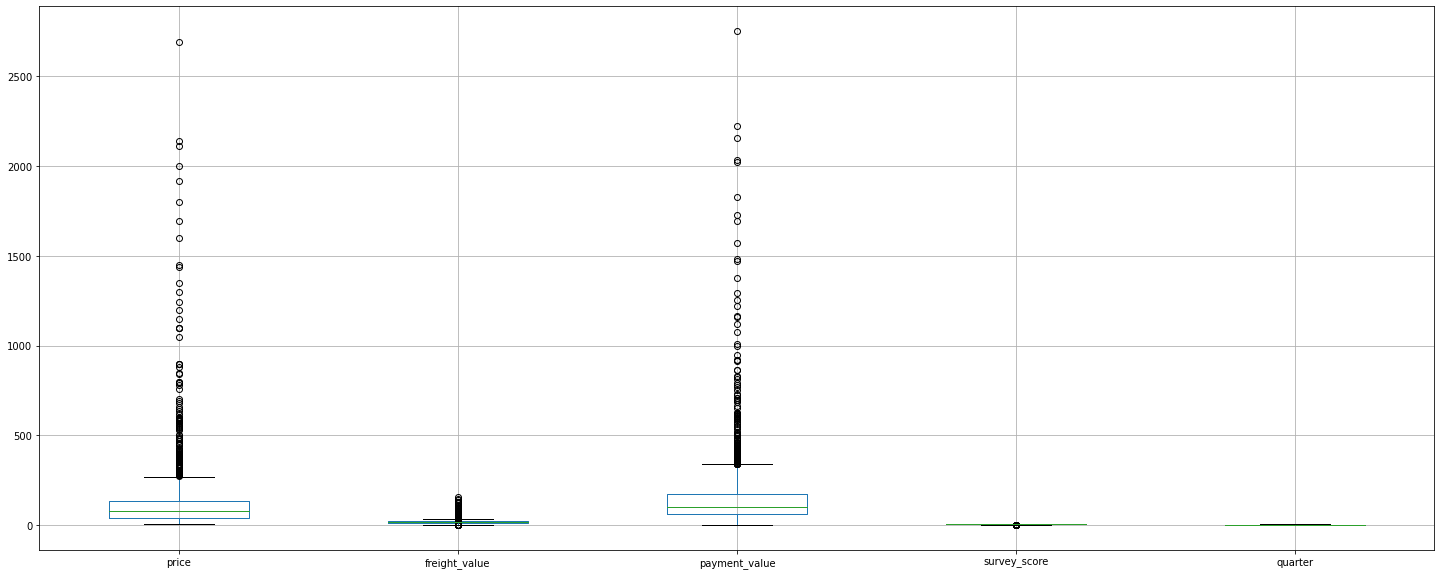

In [28]:
plot = df.toPandas().boxplot(figsize = (25,10))

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'freight_value'}>],
       [<AxesSubplot:title={'center':'payment_value'}>,
        <AxesSubplot:title={'center':'survey_score'}>],
       [<AxesSubplot:title={'center':'quarter'}>, <AxesSubplot:>]],
      dtype=object)

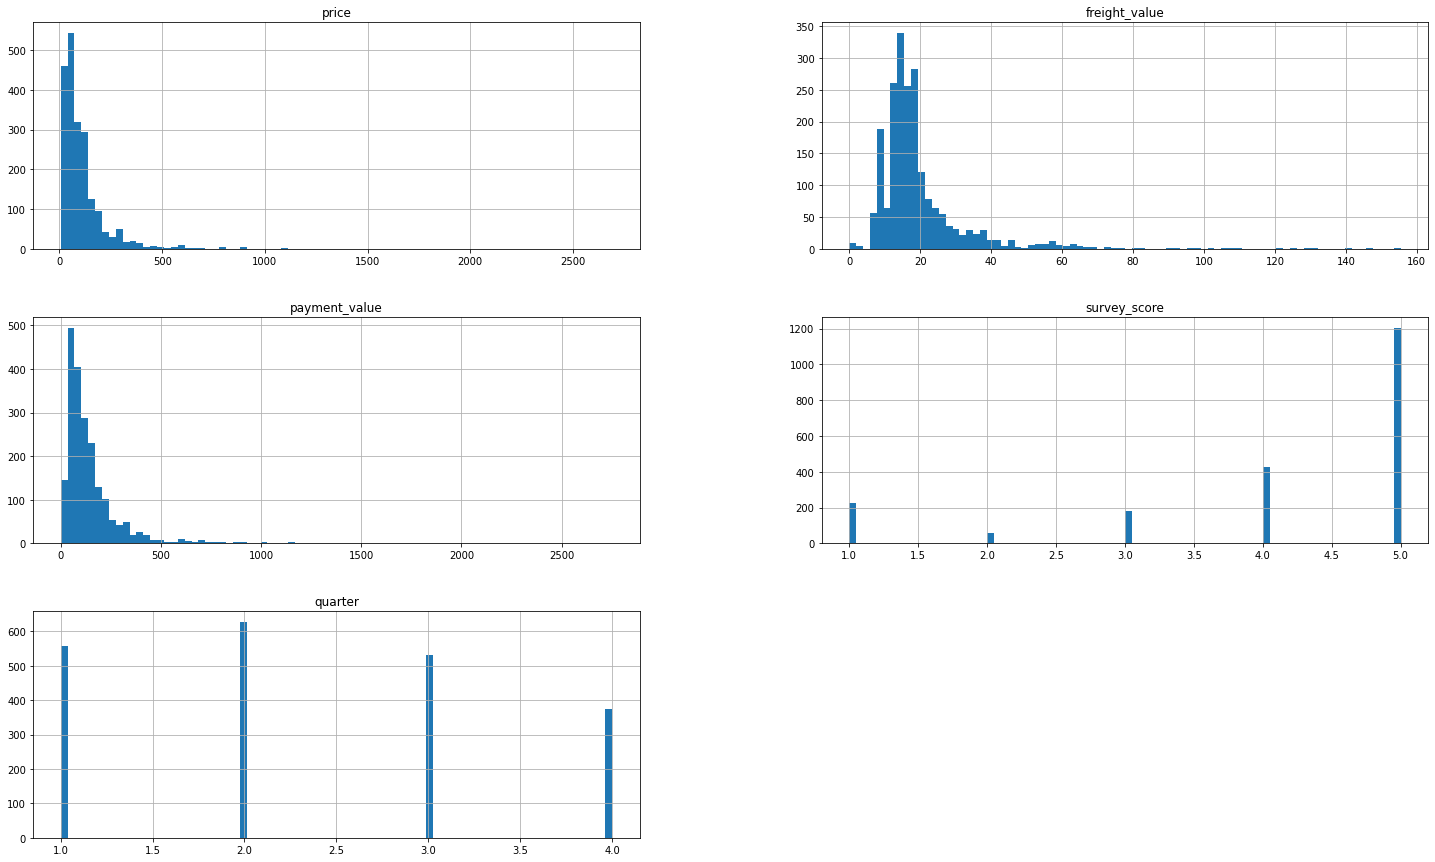

In [29]:
df.toPandas().hist(figsize = (25,15), bins = 80)

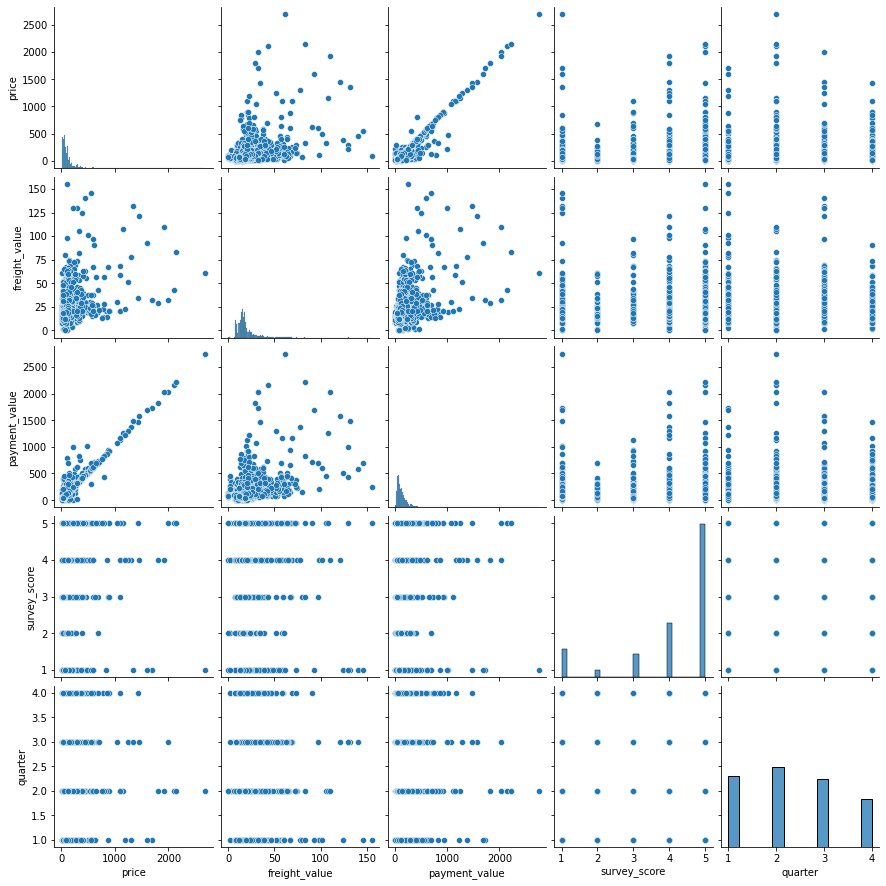

In [30]:
sns.pairplot(df.toPandas())
plt.show()

In [31]:
display(df.toPandas().describe())

,price,freight_value,payment_value,survey_score,quarter
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,123.269090,19.822749,153.551015,4.115900,2.343870
std,182.136296,13.999481,193.904080,1.312275,1.057318
min,5.990000,0.000000,0.000000,1.000000,1.000000
25%,41.200000,13.142500,61.087500,4.000000,1.000000
50%,78.000000,16.235000,102.995000,5.000000,2.000000
75%,132.750000,20.990000,172.140000,5.000000,3.000000
max,2690.000000,155.390000,2751.240000,5.000000,4.000000


## Create feature vector

In [32]:
vectorAssembler = VectorAssembler(inputCols = ['quarter', 'price','freight_value', 'survey_score'], outputCol = 'features')
v_df = vectorAssembler.transform(df)
v_df = v_df.select(['features', 'payment_value'])
v_df = v_df.withColumnRenamed('payment_value', 'label')

v_df.printSchema()
v_df.show(10, False)

print("Data count = {}".format(v_df.count()))

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)

+----------------------+------+
|features              |label |
+----------------------+------+
|[1.0,109.9,25.51,5.0] |135.41|
|[2.0,179.9,15.01,5.0] |389.82|
|[4.0,49.9,7.78,5.0]   |57.68 |
|[4.0,99.9,14.35,4.0]  |232.72|
|[1.0,149.0,45.12,5.0] |194.12|
|[2.0,118.9,18.93,5.0] |137.83|
|[1.0,243.37,53.83,5.0]|297.2 |
|[4.0,89.9,17.88,5.0]  |215.56|
|[2.0,56.99,15.15,1.0] |72.14 |
|[4.0,39.49,8.27,5.0]  |95.52 |
+----------------------+------+
only showing top 10 rows

Data count = 2088


## Split datasets

In [33]:
train_df, test_df = v_df.randomSplit([0.7, 0.3], seed = 42)

train_df.show(10, False)
print('number of rows in train dataframe:', train_df.count())

test_df.show(10, False)
print('number of rows in test dataframe:',test_df.count())

+---------------------+-----+
|features             |label|
+---------------------+-----+
|[1.0,6.0,8.72,3.0]   |14.72|
|[1.0,7.8,10.96,4.0]  |18.76|
|[1.0,9.9,8.72,5.0]   |18.62|
|[1.0,9.9,8.72,5.0]   |18.62|
|[1.0,10.99,14.52,5.0]|25.51|
|[1.0,11.5,10.96,5.0] |22.46|
|[1.0,12.5,14.1,4.0]  |53.2 |
|[1.0,12.9,17.63,5.0] |30.53|
|[1.0,12.98,15.1,5.0] |28.08|
|[1.0,14.67,17.63,5.0]|32.3 |
+---------------------+-----+
only showing top 10 rows

number of rows in train dataframe: 1513
+---------------------+-----+
|features             |label|
+---------------------+-----+
|[1.0,9.5,7.78,3.0]   |17.28|
|[1.0,10.99,18.23,4.0]|29.22|
|[1.0,11.87,7.39,3.0] |25.0 |
|[1.0,12.5,11.85,5.0] |20.0 |
|[1.0,13.9,10.96,5.0] |24.86|
|[1.0,14.5,10.96,3.0] |25.46|
|[1.0,14.6,7.78,5.0]  |22.38|
|[1.0,15.0,15.1,5.0]  |30.1 |
|[1.0,15.9,7.78,5.0]  |23.68|
|[1.0,16.5,12.48,5.0] |28.98|
+---------------------+-----+
only showing top 10 rows

number of rows in test dataframe: 575


## Standardize data

In [34]:
scaler = StandardScaler(inputCol = "features", outputCol = "features_scaled", withStd = True, withMean = False)
scalerModel = scaler.fit(train_df)

In [35]:
train_df_s = scalerModel.transform(train_df)
test_df_s  = scalerModel.transform(test_df)
train_df_s.show(10, False)
test_df_s.show(10, False)

+---------------------+-----+------------------------------------------------------------------------------+
|features             |label|features_scaled                                                               |
+---------------------+-----+------------------------------------------------------------------------------+
|[1.0,6.0,8.72,3.0]   |14.72|[0.9443902735590791,0.03600162908663947,0.6411418966613659,2.264242293977733] |
|[1.0,7.8,10.96,4.0]  |18.76|[0.9443902735590791,0.0468021178126313,0.8058388976385975,3.018989725303644]  |
|[1.0,9.9,8.72,5.0]   |18.62|[0.9443902735590791,0.05940268799295512,0.6411418966613659,3.7737371566295552]|
|[1.0,9.9,8.72,5.0]   |18.62|[0.9443902735590791,0.05940268799295512,0.6411418966613659,3.7737371566295552]|
|[1.0,10.99,14.52,5.0]|25.51|[0.9443902735590791,0.06594298394369462,1.067589488477412,3.7737371566295552] |
|[1.0,11.5,10.96,5.0] |22.46|[0.9443902735590791,0.06900312241605897,0.8058388976385975,3.7737371566295552]|
|[1.0,12.5,14.1,4.0

In [36]:
print(scalerModel.mean, '\n')
print(scalerModel.std)

[2.3238598810310647,119.5182088565764,19.679484467944473,4.105089226701915] 

[1.058884264268571,166.65912494017266,13.600733387426205,1.3249465430352492]


In [37]:
lr_train_df = train_df_s.drop("features")
lr_test_df = test_df_s.drop("features")

# Modeling

## Ridge regression

In [38]:
rmse_list = []

DataFrame[prediction: double, label: double, features_scaled: vector]

RMSE: 51.941823


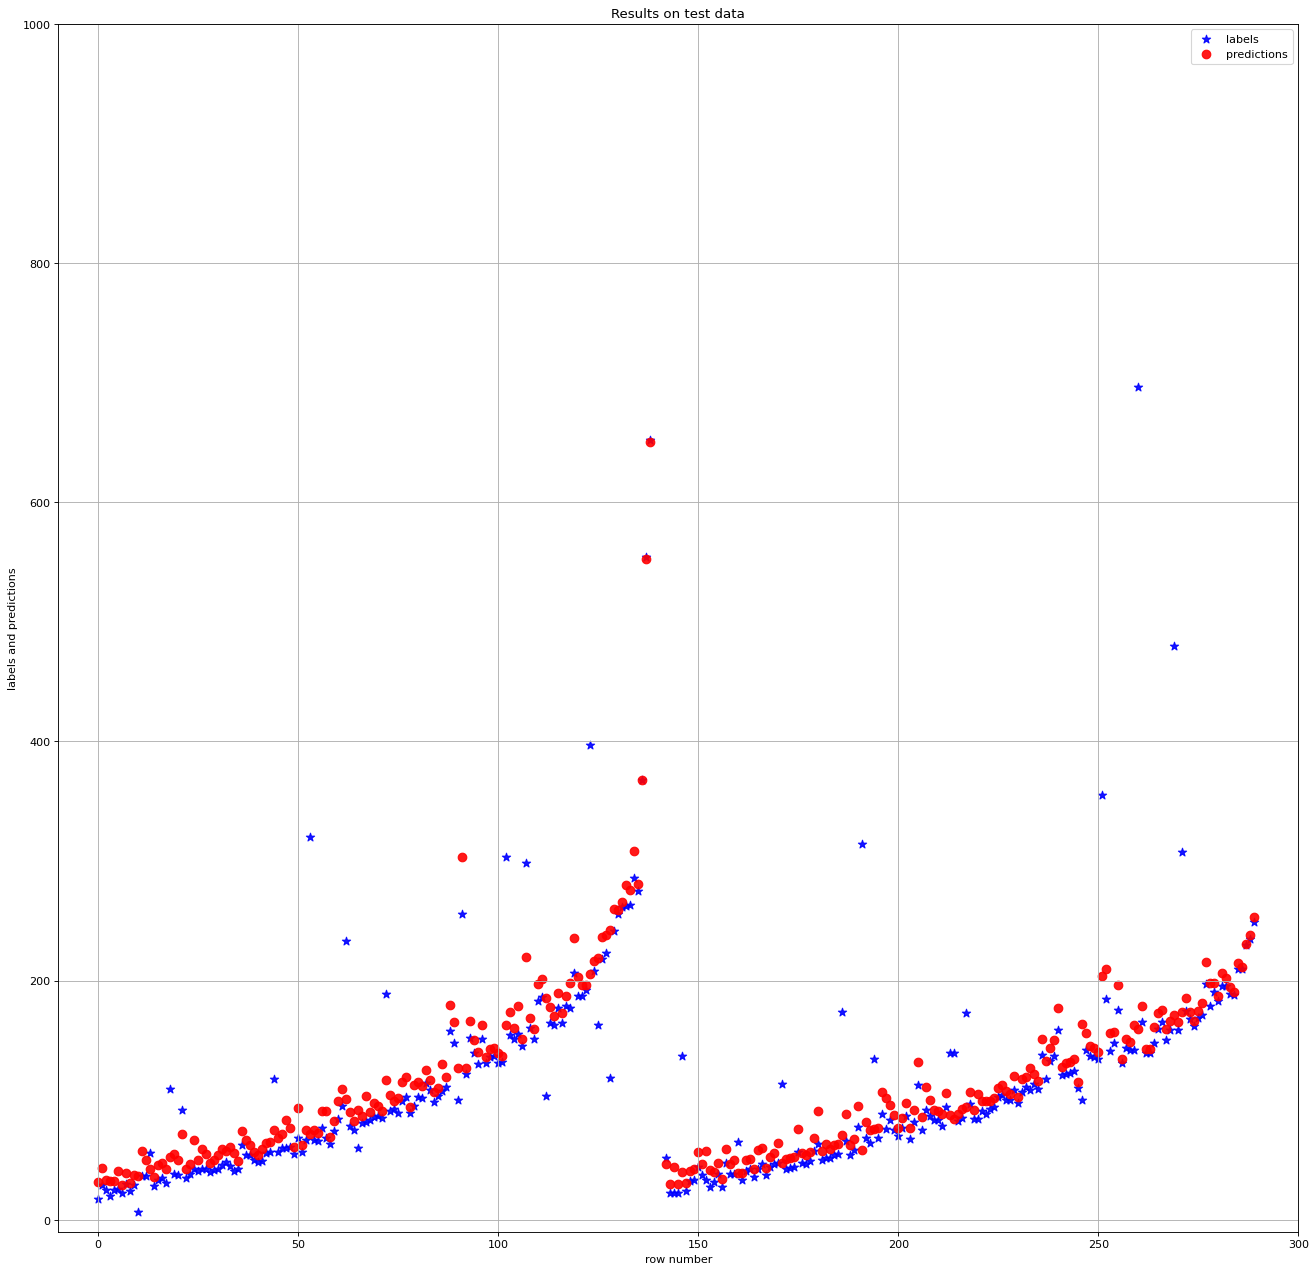

In [39]:
lr_1 = LinearRegression(featuresCol = 'features_scaled', labelCol = 'label', maxIter = 5, regParam = 1, elasticNetParam = 0)
lr_model_1 = lr_1.fit(lr_train_df)
lr_predictions = lr_model_1.transform(lr_test_df)
lr_predictions.select("prediction", "label", "features_scaled")
lr_evaluator = RegressionEvaluator(predictionCol = "prediction", labelCol = "label", metricName = "rmse")
test_result = lr_model_1.evaluate(lr_test_df)
rmse = test_result.rootMeanSquaredError

print("RMSE: %f" % rmse)

plot_function(lr_predictions)

rmse_list.append(rmse)

## Lasso regression

DataFrame[prediction: double, label: double, features_scaled: vector]

RMSE: 51.895901


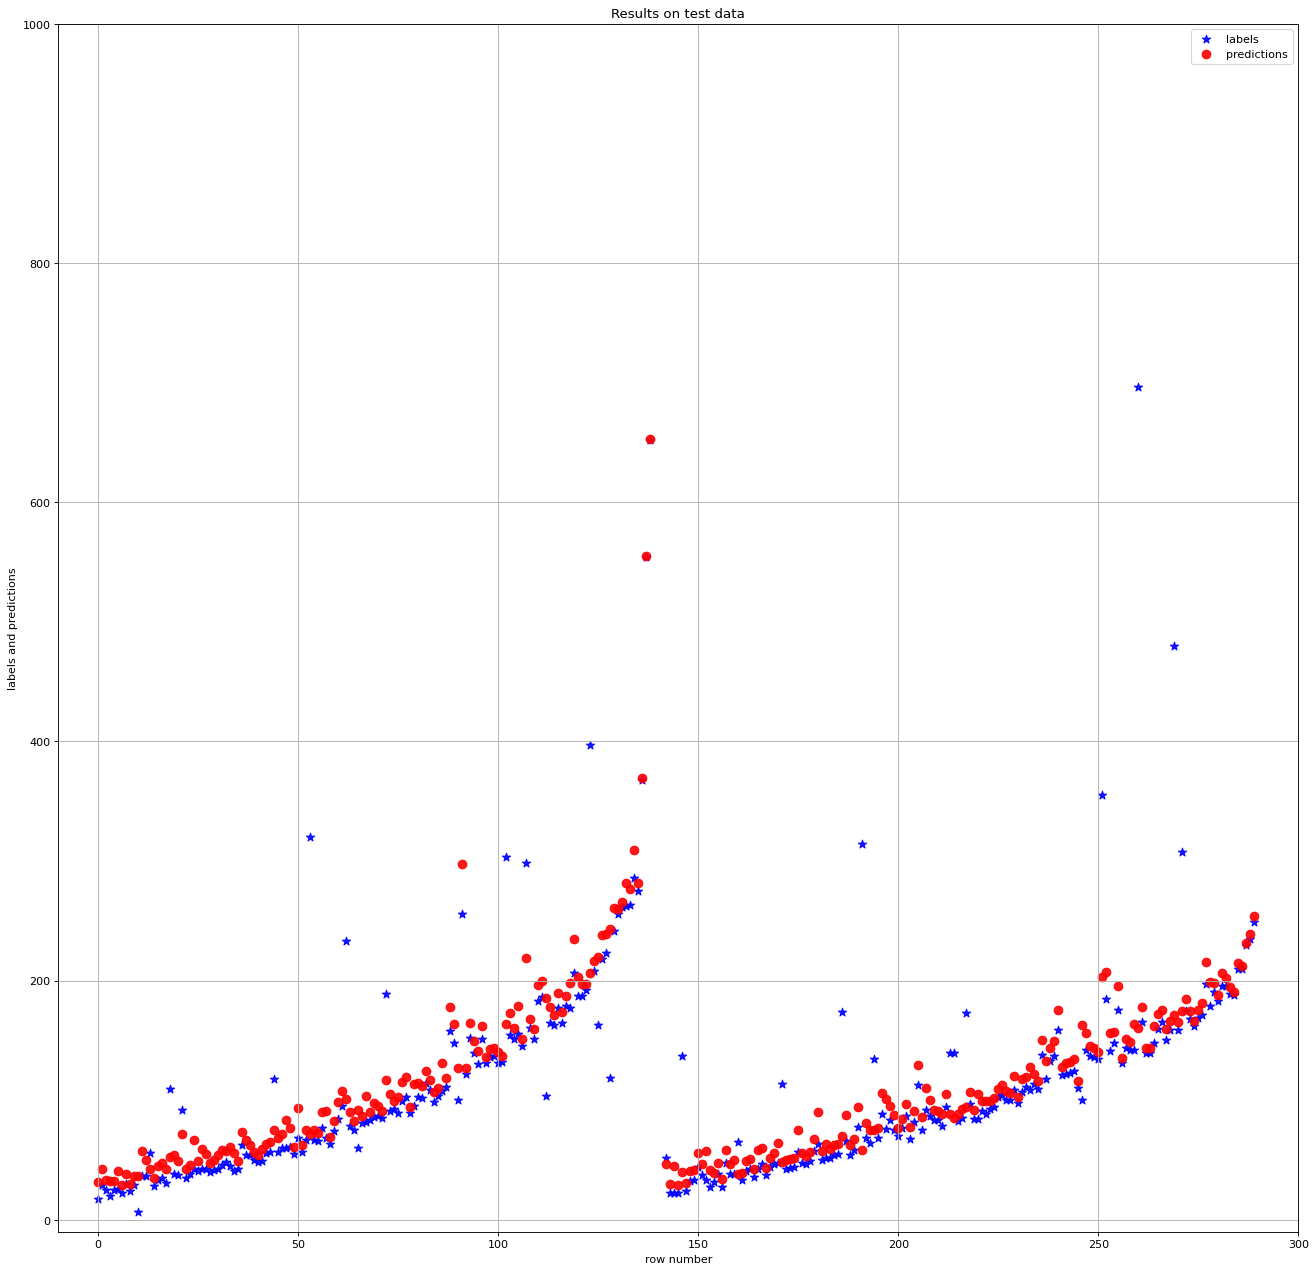

In [40]:
lr_train_df = train_df_s.drop("features")
lr_test_df = test_df_s.drop("features")

lr_2 = LinearRegression(featuresCol = 'features_scaled', labelCol = 'label', maxIter = 5, regParam = 0.3, elasticNetParam = 1) 
lr_model_2 = lr_2.fit(lr_train_df)
lr_predictions = lr_model_2.transform(lr_test_df)
lr_predictions.select("prediction", "label", "features_scaled")
lr_evaluator = RegressionEvaluator(predictionCol = "prediction", labelCol = "label", metricName = "rmse")
test_result = lr_model_2.evaluate(lr_test_df)
rmse = test_result.rootMeanSquaredError

print("RMSE: %f" % rmse)

plot_function(lr_predictions)

rmse_list.append(rmse)

## Hyperparameter tuning

In [41]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

lr_3 = LinearRegression(featuresCol = 'features_scaled', labelCol = 'label')

# Create ParamGrid for Cross Validation
lrparamGrid = (ParamGridBuilder()
             .addGrid(lr_3.regParam, [0.1, 0.5, 1.0, 2.0])
             .addGrid(lr_3.elasticNetParam, [0.0, 0.5, 0.7, 1.0])
             .addGrid(lr_3.maxIter, [1, 5, 10, 15])
             .build())

lrevaluator = RegressionEvaluator(predictionCol = "prediction", labelCol = "label", metricName = "rmse")

# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = lr_3, estimatorParamMaps = lrparamGrid, evaluator = lrevaluator, numFolds = 5)

# Run cross validations
lrcvModel = lrcv.fit(lr_test_df)
best_model = lrcvModel.bestModel

In [42]:
best_reg_param = best_model._java_obj.getRegParam()
best_elasticnet_param = best_model._java_obj.getElasticNetParam()
best_max_Iter = best_model._java_obj.getMaxIter()
print('best regParam:', best_reg_param, '\nbest elasticNetParam:', best_elasticnet_param, '\nbest max iter:', best_max_Iter)

best regParam: 0.1 
best elasticNetParam: 1.0 
best max iter: 5


DataFrame[prediction: double, label: double, features_scaled: vector]

RMSE: 51.879311


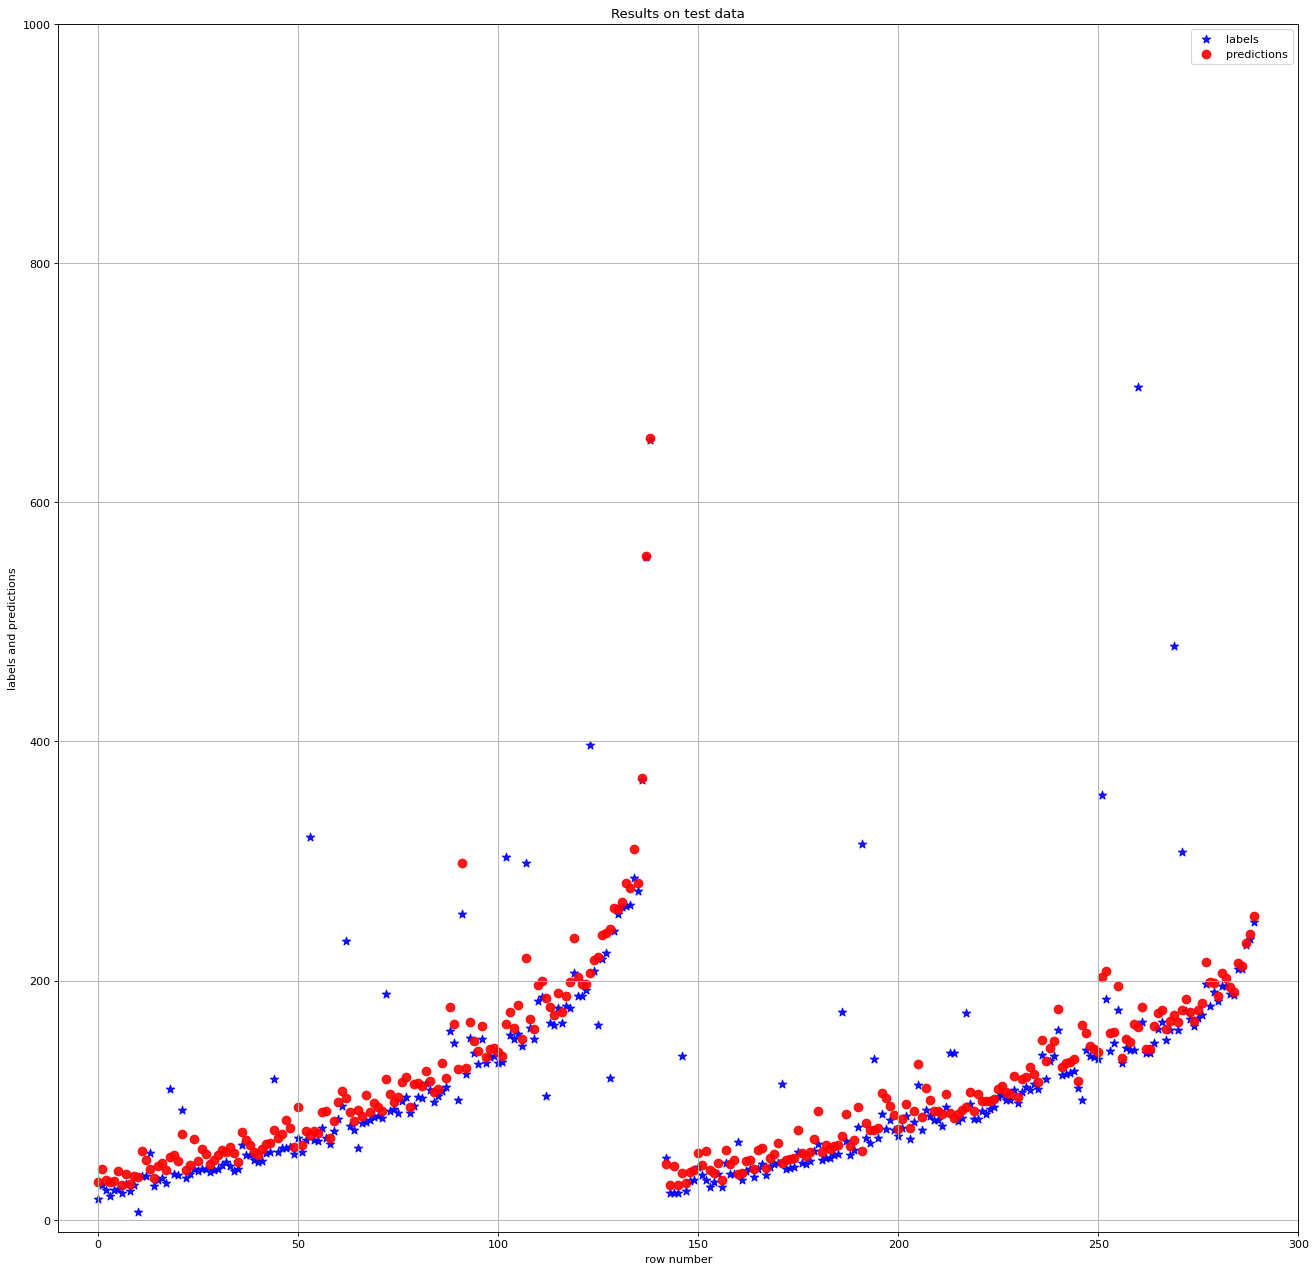

In [43]:
lr_3 = LinearRegression(featuresCol = 'features_scaled', labelCol = 'label', maxIter = best_max_Iter, regParam = best_reg_param, elasticNetParam = best_elasticnet_param) 
lr_model_3 = lr_3.fit(lr_train_df)
lr_predictions = lr_model_3.transform(lr_test_df)
lr_predictions.select("prediction", "label", "features_scaled")
lr_evaluator = RegressionEvaluator(predictionCol = "prediction", labelCol = "label", metricName = "rmse")
test_result = lr_model_3.evaluate(lr_test_df)
rmse = test_result.rootMeanSquaredError

print("RMSE: %f" % rmse)

plot_function(lr_predictions)

rmse_list.append(rmse)

## Gradient-boosted tree regression

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
| 29.68978303982267|17.28|  [1.0,9.5,7.78,3.0]|
| 34.26632314541024|29.22|[1.0,10.99,18.23,...|
| 31.15213527015517| 25.0|[1.0,11.87,7.39,3.0]|
| 30.36432902162655| 20.0|[1.0,12.5,11.85,5.0]|
|31.397649145209886|24.86|[1.0,13.9,10.96,5.0]|
+------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 140.471
GBTRegressionModel: uid=GBTRegressor_dbf1bb3e4591, numTrees=10, numFeatures=4


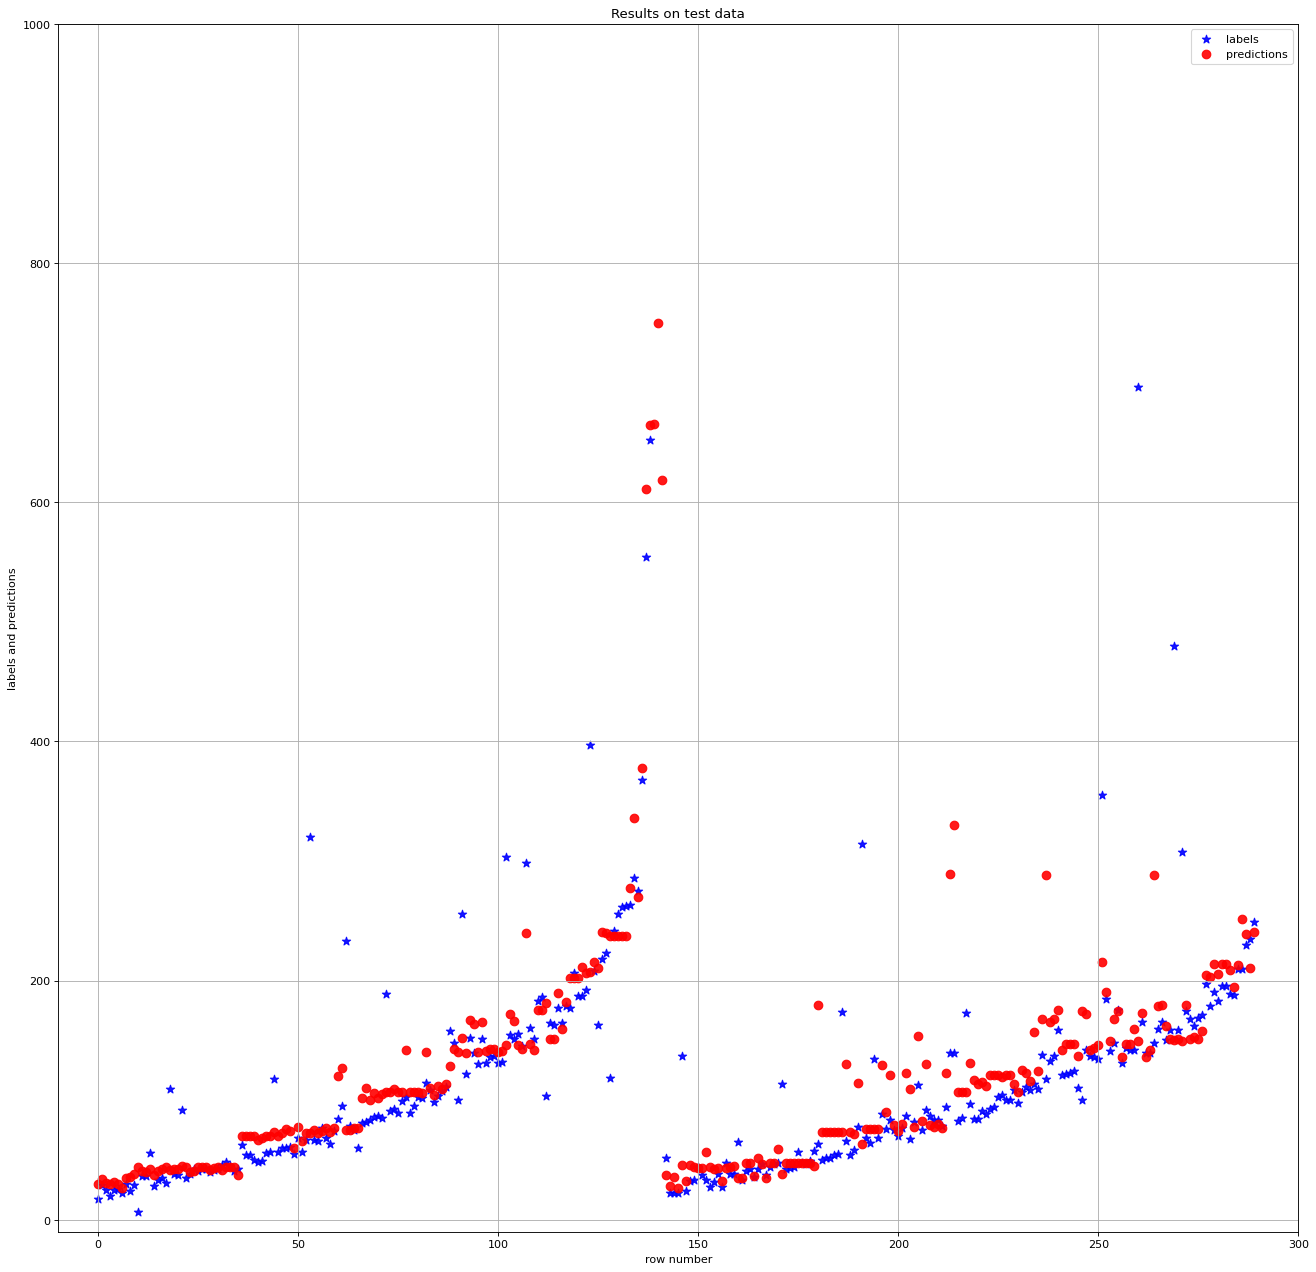

In [44]:
# Identify categorical features, and index them.
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(v_df)

# Train a GBT model.
gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=10)

rmse = fit_predict_plot_function(featureIndexer, gbt, train_df, test_df)

rmse_list.append(rmse)

## Decision tree regression

+----------------+-----+--------------------+
|      prediction|label|            features|
+----------------+-----+--------------------+
|42.9671794871795|17.28|  [1.0,9.5,7.78,3.0]|
|42.9671794871795|29.22|[1.0,10.99,18.23,...|
|42.9671794871795| 25.0|[1.0,11.87,7.39,3.0]|
|42.9671794871795| 20.0|[1.0,12.5,11.85,5.0]|
|42.9671794871795|24.86|[1.0,13.9,10.96,5.0]|
+----------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 140.684
DecisionTreeRegressionModel: uid=DecisionTreeRegressor_dd042cef3ef2, depth=5, numNodes=61, numFeatures=4


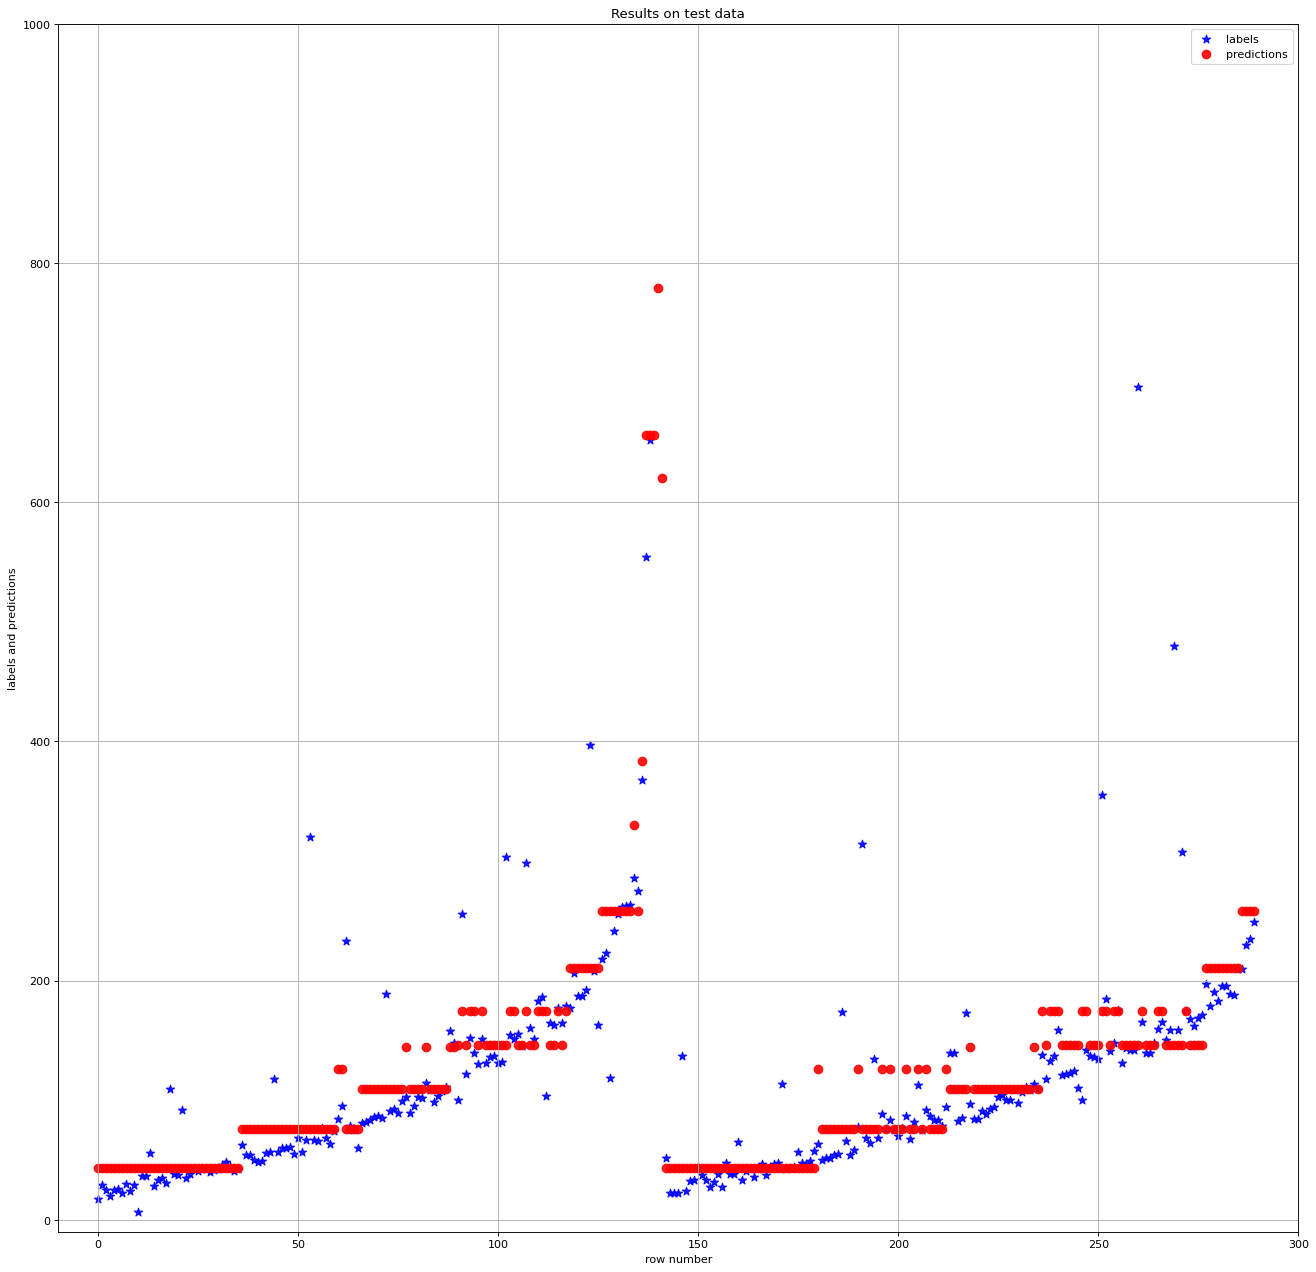

In [45]:
# Identify categorical features, and index them.
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(v_df)

# Train a DecisionTree model.
dt = DecisionTreeRegressor(featuresCol="indexedFeatures")

rmse = fit_predict_plot_function(featureIndexer,dt , train_df, test_df)

rmse_list.append(rmse)

## Random forest regression

+-----------------+-----+--------------------+
|       prediction|label|            features|
+-----------------+-----+--------------------+
| 54.6541450871861|17.28|  [1.0,9.5,7.78,3.0]|
|66.86202518590429|29.22|[1.0,10.99,18.23,...|
| 54.6541450871861| 25.0|[1.0,11.87,7.39,3.0]|
| 54.8361410220902| 20.0|[1.0,12.5,11.85,5.0]|
| 54.8361410220902|24.86|[1.0,13.9,10.96,5.0]|
+-----------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 135.09
RandomForestRegressionModel: uid=RandomForestRegressor_4e748c4fb93e, numTrees=20, numFeatures=4


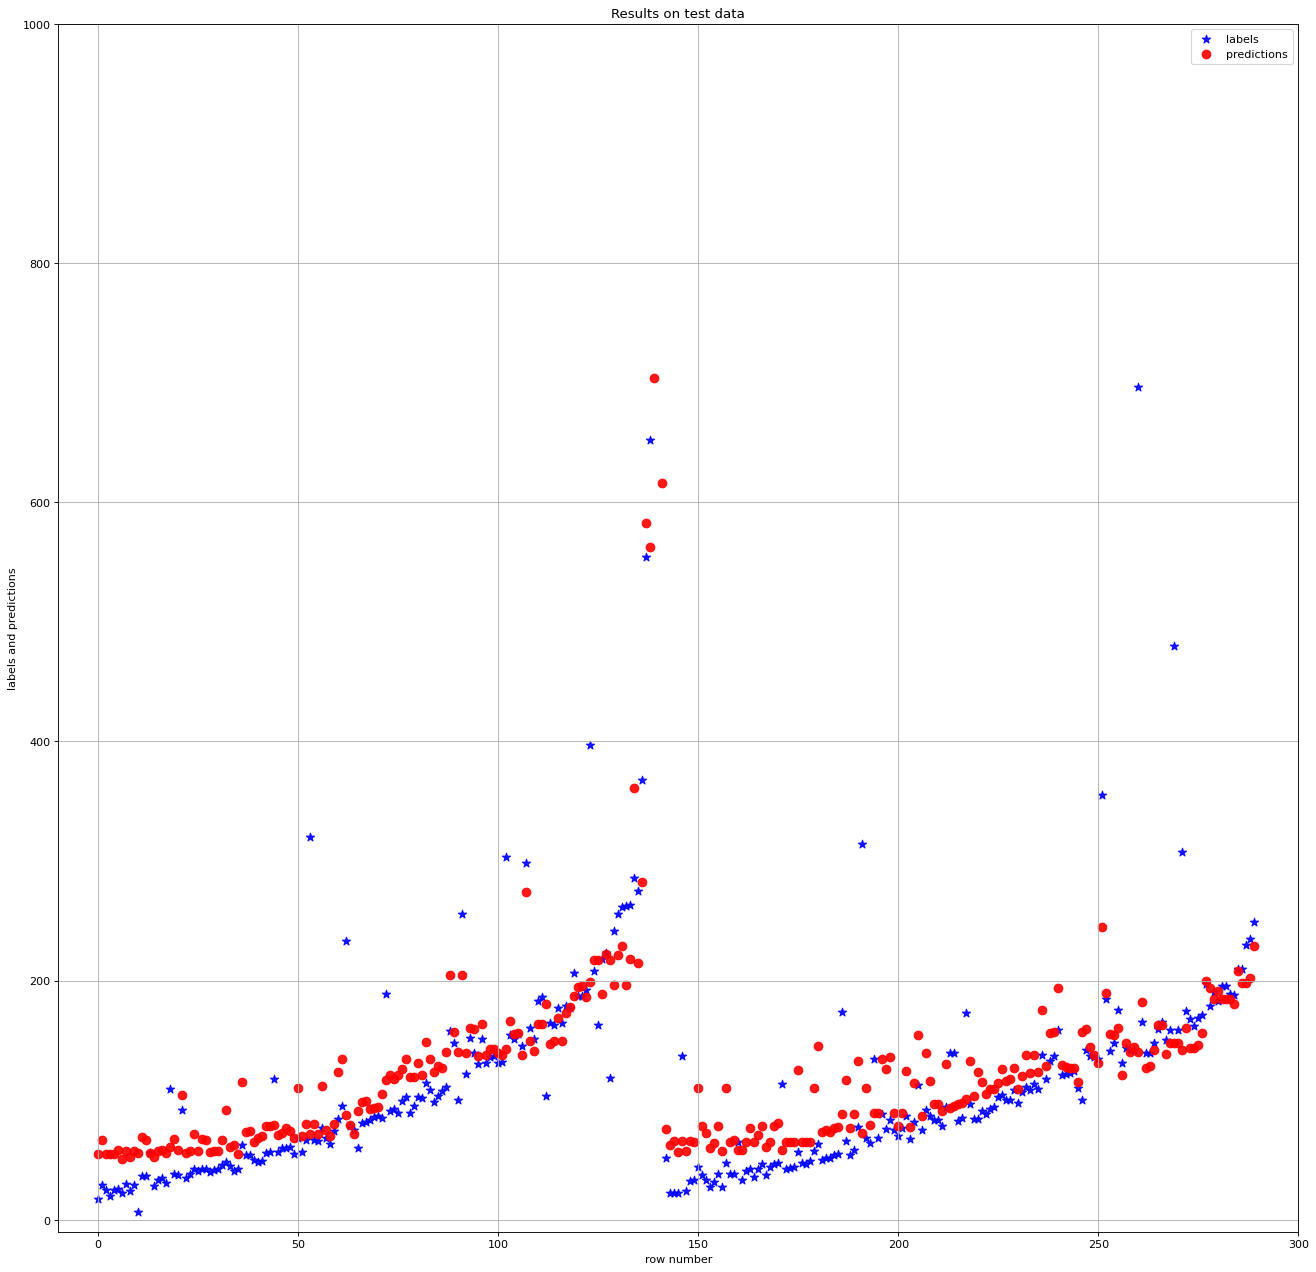

In [46]:
# Identify categorical features, and index them.
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(v_df)

# Train a DecisionTree model.
rf = RandomForestRegressor(featuresCol="indexedFeatures")

rmse = fit_predict_plot_function(featureIndexer, rf, train_df, test_df)

rmse_list.append(rmse)

# Results

In [47]:
# Show the RMSE results
rmse_list

[51.94182282480001,
 51.895900687515734,
 51.87931101256097,
 140.47056799019543,
 140.68440960751286,
 135.08950056945932]

<Figure size 1440x800 with 0 Axes>

Text(0.5, 1.0, 'Compare results')

Text(0, 0.5, 'RMSE')

(-0.5, 2.5)

(51.77931101256097, 52.041822824800015)

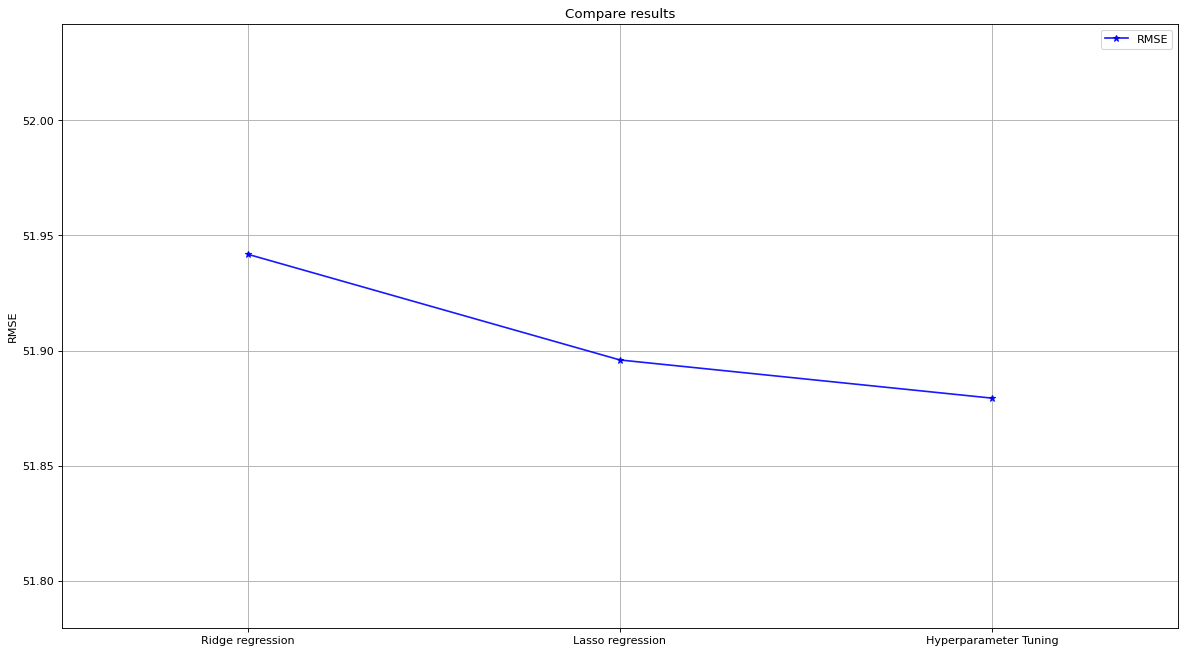

In [48]:
figure(figsize = (18, 10), dpi = 80)

plt.title('Compare results')
plt.ylabel('RMSE')
x = ['Ridge regression', 'Lasso regression', 'Hyperparameter Tuning']
y = rmse_list[:3]

plt.plot(x, y, color = 'blue', marker = '*', label = 'RMSE', alpha = 0.9)

y_max = np.max(y)+0.1
y_min = np.min(y)-0.1

plt.xlim(-0.5, 2.5)
plt.ylim(y_min, y_max)

plt.legend()
plt.grid()
plt.show()

<Figure size 1440x800 with 0 Axes>

Text(0.5, 1.0, 'Compare results')

Text(0, 0.5, 'RMSE')

(-0.5, 2.5)

(134.98950056945932, 140.78440960751286)

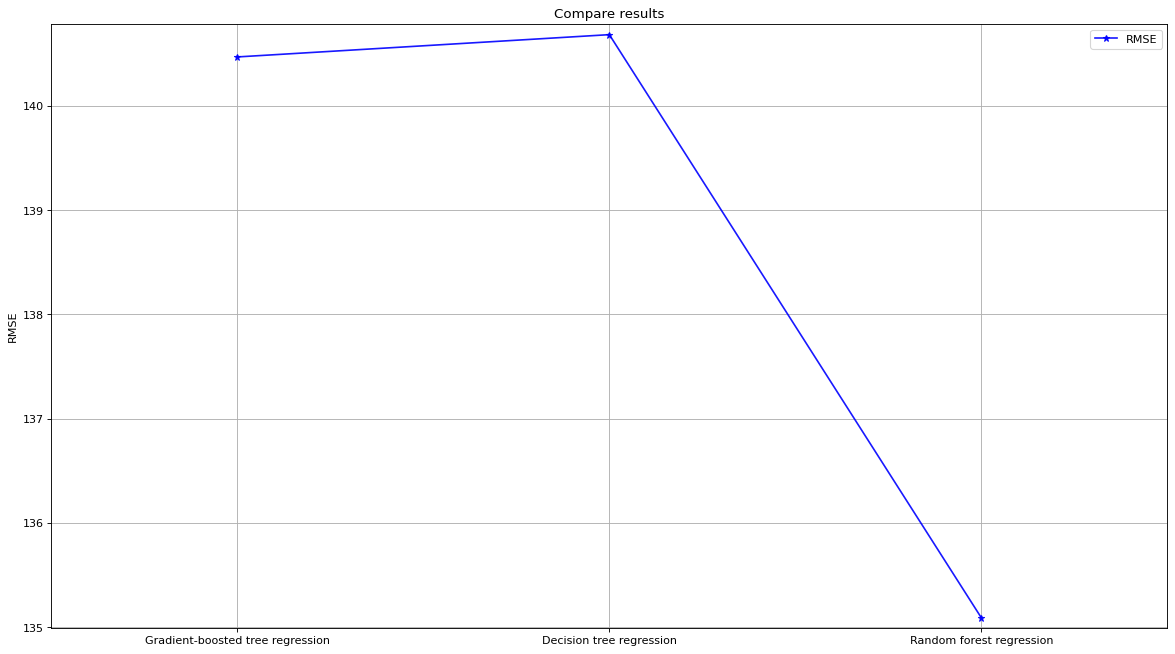

In [49]:
figure(figsize = (18, 10), dpi = 80)

plt.title('Compare results')
plt.ylabel('RMSE')
x = ['Gradient-boosted tree regression', 'Decision tree regression', 'Random forest regression']
y = rmse_list[3:]

plt.plot(x, y, color = 'blue', marker = '*', label = 'RMSE', alpha = 0.9)

y_max = np.max(y)+0.1
y_min = np.min(y)-0.1

plt.xlim(-0.5, 2.5)
plt.ylim(y_min, y_max)

plt.legend()
plt.grid()
plt.show()

# Conclusion

As we know, RMSE is a vary good measure of how accurately different models predict the future, and it is the most important criterion for fit if the main purpose of the model is prediction. Since lower values of RMSE indicate better fit, we can see from the above models that the results for Linear regression after hyperparameter tuning is much better than Gradient-boosted tree regression, Decision tree regression, and Random forest regression. Hence, for sales forecast of e-commerce data, linear regression is preferred.

# Stop the spark session

In [50]:
spark.stop()